# Linear Regression

In [5]:
!pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ------ --------------------------------- 1.8/11.1 MB 9.8 MB/s eta 0:00:01
   --------- ------------------------------ 2.6/11.1 MB 7.9 MB/s eta 0:00:02
   ------------- -------------------------- 3.7/11.1 MB 6.8 MB/s eta 0:00:02
   ----------------- ---------------------- 5.0/11.1 MB 6.3 MB/s eta 0:00:01
   ---------------------- ----------------- 6.3/11.1 MB 6.4 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/11.1 MB 6.6 MB/s eta 0:00:01
   ---------------------------------- ----- 9.4/11.1 MB 6.5 MB/s eta 0:00:01
   -------------------------------------- - 10.7/11.1 MB 6.4 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 6.2 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ---------------------------------------- 0.0/41.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

Dataset

In [2]:
from sklearn.datasets import fetch_california_housing

- Features:

  - MedInc: Median income in block group

  - HouseAge: Median house age

  - AveRooms: Average rooms per household

  - AveBedrms: Average bedrooms per household

  - Population: Block group population

  - AveOccup: Average household size

  - Latitude, Longitude: Location

- Target:

  - MedHouseVal: Median house value (in $100,000s)

In [3]:
housing = fetch_california_housing(as_frame=True)

In [4]:
df = housing.frame

In [5]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [7]:
df.shape

(20640, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# Visualization

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MedHouseVal'}>]], dtype=object)

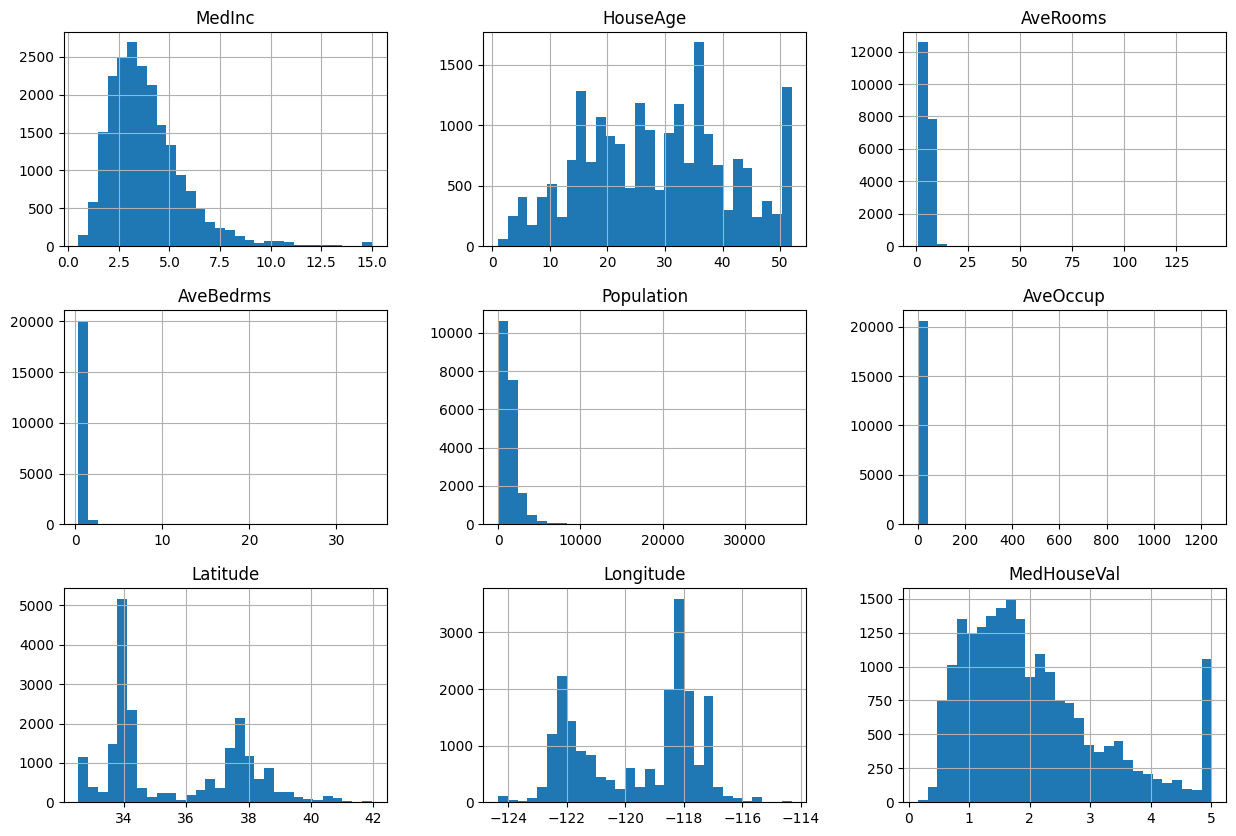

In [10]:
df.hist(bins=30, figsize=(15,10))

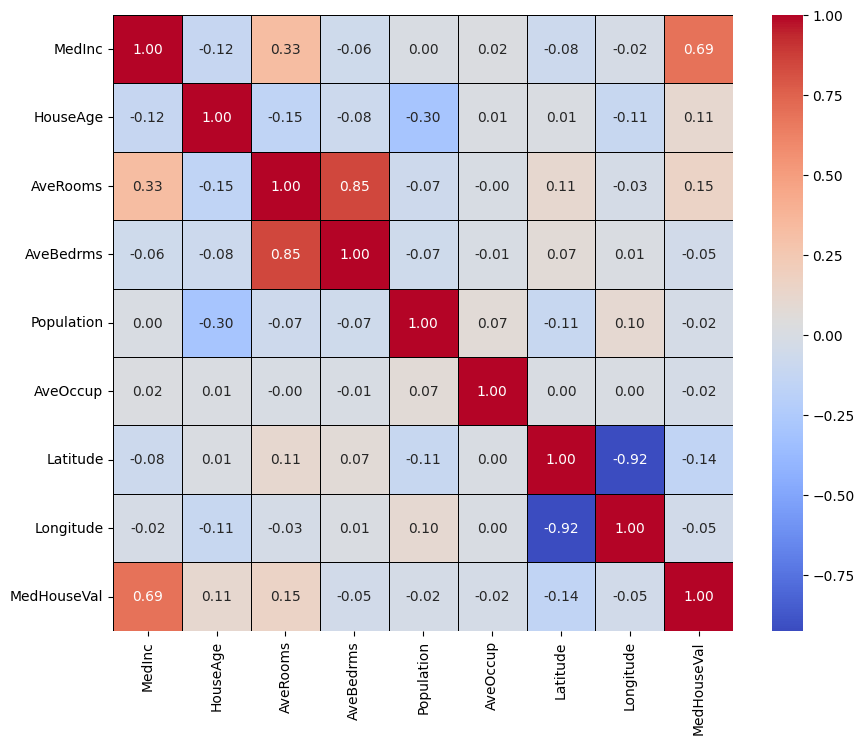

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,linecolor='black')
plt.show()

In [12]:
!pip install plotly

In [13]:
import plotly.express as px

In [14]:
df.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

In [15]:
!pip install nbformat

In [16]:
fig = px.scatter_mapbox(
    df,
    lat='Latitude',
    lon='Longitude',
    color='MedHouseVal',
    size='AveRooms',
    hover_name='HouseAge',
    mapbox_style='carto-positron',
    zoom=4.5,
    title='California Housing Values',
)
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()

C:\Users\sushi\AppData\Local\Temp\ipykernel_3384\1262401685.py:1: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(


In [17]:
import matplotlib.image as mpimg

In [18]:
california_img = mpimg.imread('images/cal.jpg')

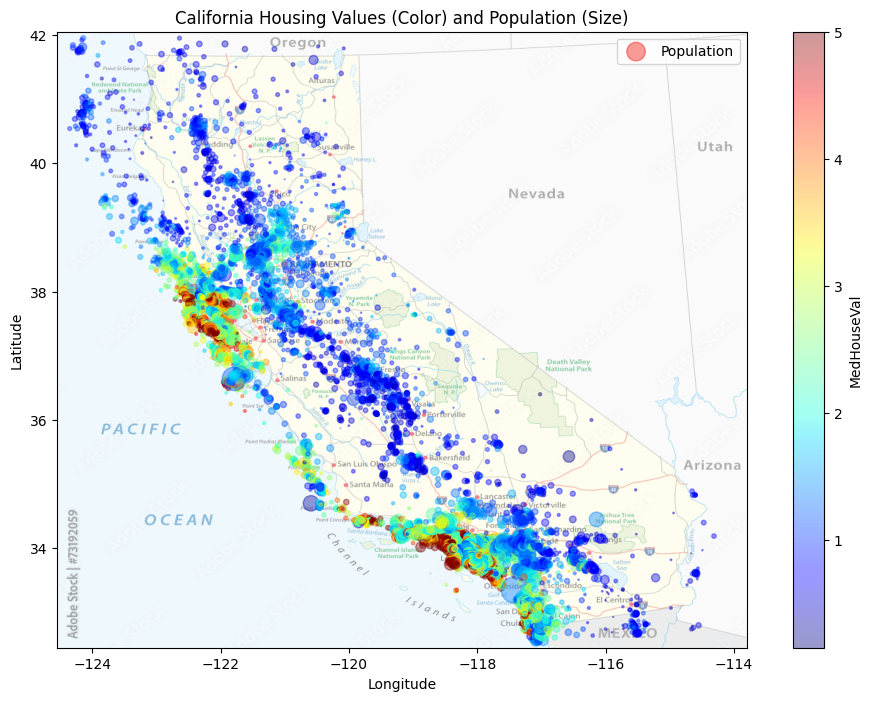

In [19]:
ax = df.plot(
    kind="scatter",
    x="Longitude",
    y="Latitude",
    figsize=(12, 8),
    s=df['Population']/100,  # Size by population
    c="MedHouseVal",         # Color by median house value
    cmap=plt.get_cmap("jet"),
    colorbar=True,
    alpha=0.4,
    label="Population"
)

# Overlay California map
plt.imshow(
    california_img,
    extent=[-124.55, -113.80, 32.45, 42.05],
    alpha=0.5
)

plt.title("California Housing Values (Color) and Population (Size)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

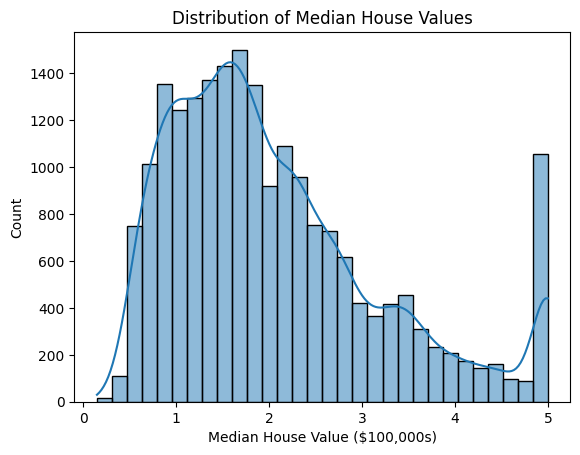

In [20]:
sns.histplot(df['MedHouseVal'], bins=30, kde=True)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value ($100,000s)')
plt.show()

Train-Test Split

In [21]:
X = df.drop('MedHouseVal', axis=1)
y=df['MedHouseVal']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Scale

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [26]:
print(f'X_train_shape: {X_train.shape}')
print(f'X_test_shape: {X_test.shape}')
print(f'y_train_shape: {y_train.shape}')
print(f'y_test_shape: {y_test.shape}')

X_train_shape: (16512, 8)
X_test_shape: (4128, 8)
y_train_shape: (16512,)
y_test_shape: (4128,)


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test_scaled)

In [30]:
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

R2 Score:  0.5757877060324508
Mean Squared Error:  0.5558915986952444


R2 score tells how much of the variance in the target variable is explained by the features. Model explains about 57.6% of the variability in the median house values across California Districts. 

MSE of 55% -> RMSE of 75% meaning on average the predictions are off by about $75,000

### Feature Engineering

In [37]:
df['BedroomsPerRoom'] = df['AveBedrms'] / df['AveRooms']
df['PopulationPerHousehold'] = df['Population'] / df['AveOccup']

In [35]:
df['HouseAgeGroup'] = pd.cut(
    df['HouseAge'],
    bins=[0,10,20,30,40,50,np.inf],
    labels=['0-10','10-20','20-30','30-40','40-50','50+']
)

In [36]:
df['MedInc_HouseAge'] = df['MedInc'] * df['HouseAge']

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MedHouseVal'}>],
       [<Axes: title={'center': 'MedInc_HouseAge'}>,
        <Axes: title={'center': 'BedroomsPerRoom'}>,
        <Axes: title={'center': 'PopulationPerHousehold'}>]], dtype=object)

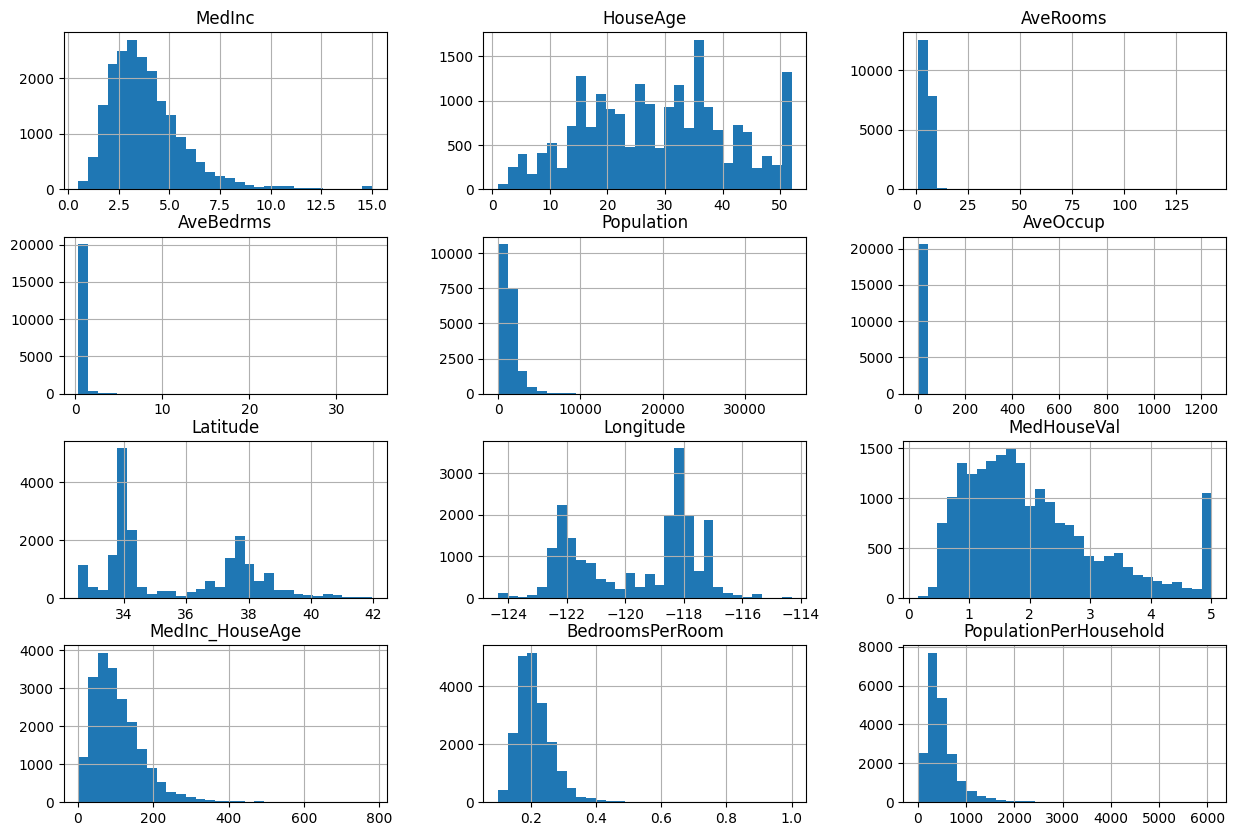

In [41]:
df.hist(bins=30, figsize=(15,10))

In [40]:
df = pd.get_dummies(df, columns=['HouseAgeGroup'], drop_first=True)

In [42]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,MedInc_HouseAge,BedroomsPerRoom,PopulationPerHousehold,HouseAgeGroup_10-20,HouseAgeGroup_20-30,HouseAgeGroup_30-40,HouseAgeGroup_40-50,HouseAgeGroup_50+
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,341.3332,0.146591,126.0,False,False,False,True,False
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,174.3294,0.155797,1138.0,False,True,False,False,False
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,377.3848,0.129516,177.0,False,False,False,False,True
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,293.4412,0.184458,219.0,False,False,False,False,True
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,200.0024,0.172096,259.0,False,False,False,False,True


<Axes: >

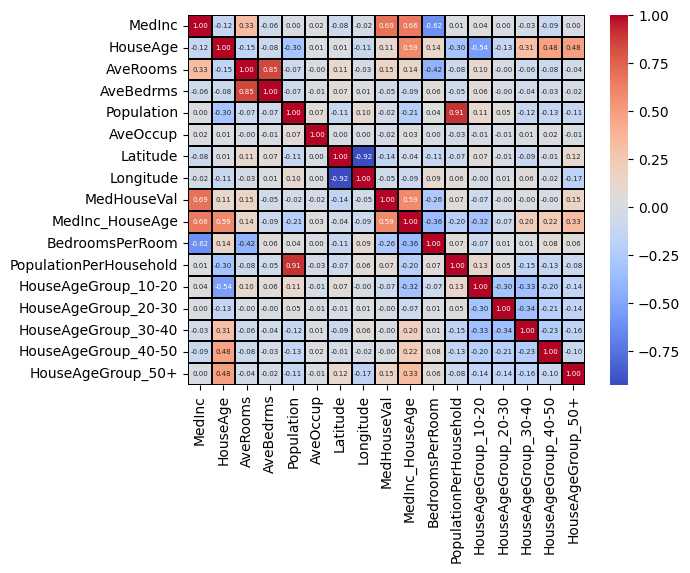

In [52]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.2,linecolor='black', annot_kws={"size": 5})

In [43]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [45]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [46]:
y_pred = model.predict(X_test_scaled)

In [47]:
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

R2 Score:  0.633844711738633
Mean Squared Error:  0.4798131771680801


- Change in R2 Score = 0.633844711738633 - 0.5757877060324508 = 0.0580570057
- Change in Mean Squared Error = 0.4798131771680801 - 0.5558915986952444 = -0.07607842152